In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.graph_objects as pgo
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from scipy import stats

In [2]:
Maternal_Health = pd.read_csv("Maternal Health Risk Data Set.csv")
Maternal_Health.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
col_names = ['Age', 'SystolicBP', 'DiasolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate', 'RiskLevel']
Maternal_Health.columns = col_names
Maternal_Health.head()

# SystolicBP -> Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
# DiasolicBP -> Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.


,Age,SystolicBP,DiasolicBP,BloodSugar,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [6]:
num_instances = Maternal_Health.shape[0]
num_attributes = Maternal_Health.shape[1]

print("Number of instances:", num_instances)
print("Number of attributes:", num_attributes)


Maternal_Health.dtypes


Number of instances: 1014
Number of attributes: 7


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [10]:
# Summary Statistics of continuous features

continuous_features = ['Age', 'SystolicBP', 'DiasolicBP', 'BloodSugar', 'BodyTemp', 'HeartRate']
Maternal_Health[continuous_features].describe()




,Age,SystolicBP,DiasolicBP,BloodSugar,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [12]:
bp_compare = Maternal_Health[['SystolicBP', 'DiasolicBP', 'RiskLevel']]
bp_compare.head(10)

,SystolicBP,DiasolicBP,RiskLevel
0,130,80,high risk
1,140,90,high risk
2,90,70,high risk
3,140,85,high risk
4,120,60,low risk
5,140,80,high risk
6,130,70,mid risk
7,85,60,high risk
8,120,90,mid risk
9,130,80,high risk


Missing values:
 Age           0
SystolicBP    0
DiasolicBP    0
BloodSugar    0
BodyTemp      0
HeartRate     0
RiskLevel     0
dtype: int64


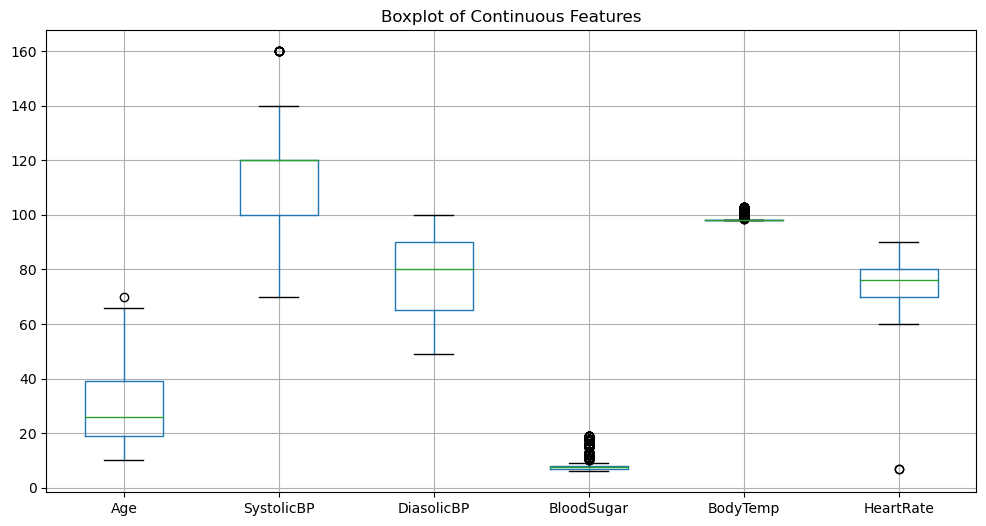

In [13]:
# Check for missing values
missing_values = Maternal_Health.isnull().sum()
print("Missing values:\n", missing_values)

# Check for outliers in continuous features
plt.figure(figsize=(12, 6))
Maternal_Health[continuous_features].boxplot()
plt.title("Boxplot of Continuous Features")
plt.show()
